In [1]:
import esda
import pandas as pd
import geopandas as gpd
import seaborn as sns
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pylab import figure, scatter, show
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# loading file 

In [2]:
#read london borough
boros = gpd.read_file('statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

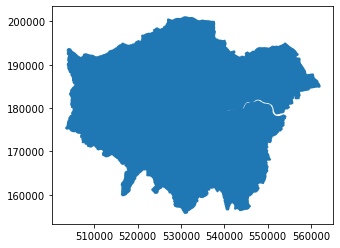

In [3]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})
# buffer the boundary by 250m
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();

<AxesSubplot:>

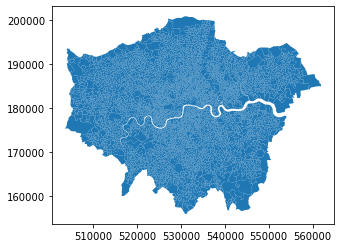

In [4]:
#lSOA Shapefile 
lsoas = gpd.read_file('statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp')
lsoas.plot()

In [5]:
green_acc = pd.read_csv("Data_firstclean/green_lsoa.csv",low_memory=False)

In [6]:
lsoa_greenacc = pd.merge(lsoas, green_acc, left_on='LSOA11CD', right_on='lsoa11', how='left')
print(lsoa_greenacc.shape)
lsoa_greenacc

(4835, 19)


,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,lsoa11,blue_dist,green_pas,green_act
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18...",E01000001,2.387111,0.046221,0.295
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18...",E01000002,2.048814,0.041072,0.320
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18...",E01000003,1.217941,0.050611,0.200
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18...",E01000005,1.181282,0.044282,0.140
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18...",E01000006,1.760714,0.527459,0.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,0,107.6,581,2.3,"POLYGON ((544642.680 179824.674, 544766.313 17...",E01033742,0.185333,0.039919,0.880
4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,0,20.4,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18...",E01033743,0.634500,0.067162,0.955
4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,117,125.8,646,2.7,"POLYGON ((544536.486 179447.115, 544602.630 17...",E01033744,0.273226,0.015671,0.600
4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,0,32.3,591,3.1,"POLYGON ((546415.745 180152.270, 546320.715 18...",E01033745,0.537037,0.104303,1.090


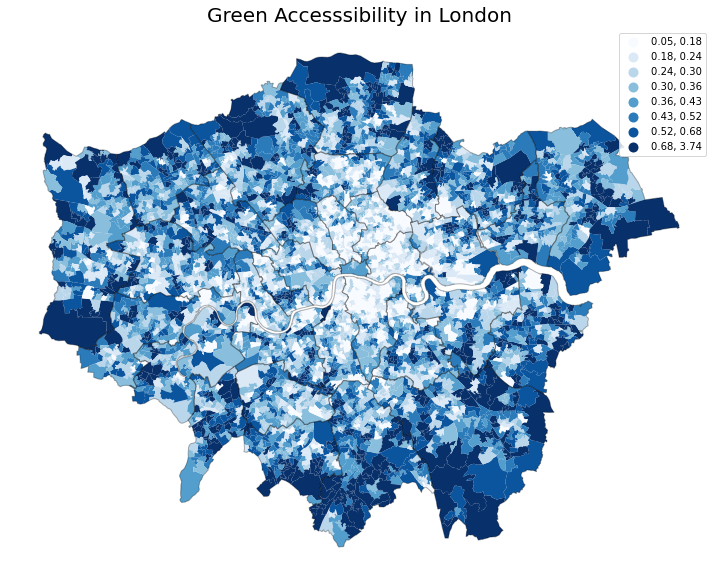

In [7]:
import os
ax=lsoa_greenacc.plot(column='green_act', scheme='quantiles',k=8,legend=True,figsize=(16,10),cmap='Blues',edgecolor='None')
plt.axis('off')
plt.title('Green Accesssibility in London',fontsize= 20)
boros.plot(ax=ax, edgecolor='k', facecolor='None', alpha=0.3)
# save figure 
plt.savefig(os.path.join('img','Green Accesssibility in London.png'))

In [8]:
# group green index at borough level
boro_green = lsoa_greenacc.groupby(['LAD11CD']).agg(
    {'green_act':['sum','mean','median']}).reset_index()

In [9]:
boro_green1 = lsoa_greenacc.groupby(['LAD11CD'],as_index=False)['blue_dist','green_act','green_pas'].sum()
boro_green2 = lsoa_greenacc.groupby(['LAD11CD'],as_index=False)['blue_dist','green_act','green_pas'].median()

In [10]:
#add green space with borough file
boro_greenacc = pd.merge(boros, boro_green2, left_on='GSS_CODE', right_on='LAD11CD', how='left')
print(boro_greenacc.shape)
boro_greenacc

(33, 12)


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,LAD11CD,blue_dist,green_act,green_pas
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",E09000021,3.443026,0.51207,0.464815
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",E09000008,2.908372,0.50500,0.584036
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",E09000006,2.637000,0.47000,0.478473
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",E09000018,1.598901,0.38250,0.564246
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",E09000009,2.013571,0.37750,0.553855
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",E09000016,1.899262,0.45000,0.647522
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",E09000017,2.395870,0.41000,0.466313
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",E09000015,2.618333,0.43000,0.321409
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",E09000005,2.081429,0.38000,0.470558
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19...",E09000003,3.113437,0.44000,0.611714


<AxesSubplot:title={'center':'Green Accesssibility in London'}>

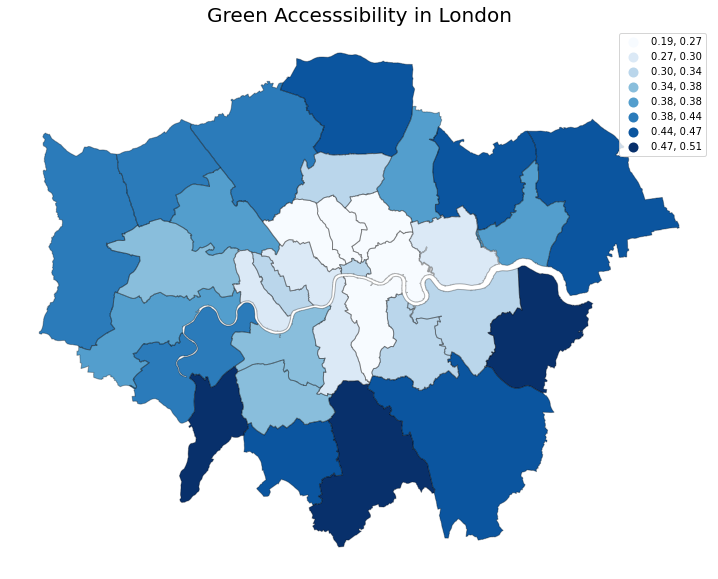

In [11]:
ax=boro_greenacc.plot(column='green_act', scheme='quantiles',k=8,legend=True,figsize=(16,10),cmap='Blues',edgecolor='None')
plt.axis('off')
plt.title('Green Accesssibility in London',fontsize= 20)
boros.plot(ax=ax, edgecolor='k', facecolor='None', alpha=0.3)
# save figure 
#plt.savefig(os.path.join('img','COVID-19 Death in London1.png'))

# moran'I

## borough level

In [12]:
### Global moran'I

In [13]:
wq = lps.weights.Queen.from_dataframe(boro_greenacc)#使用Quuen式邻接矩阵
wq.transform = 'r'

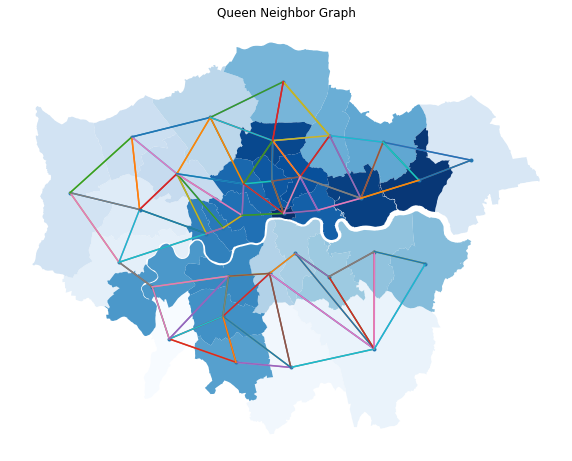

In [14]:
centroids = boro_greenacc.geometry.centroid # 计算多边形几何中心
# 本图将邻接矩阵覆盖在整个地图上，如果只需要邻接矩阵，删除ax = gdf_data.plot(figsize=(10, 10),cmap="Blues")
ax = boro_greenacc.plot(figsize=(10, 10),cmap="Blues")
plt.plot(centroids.x, centroids.y, '.')
for k, neighs in wq.neighbors.items():
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment.x, segment.y, '-')
plt.title('Queen Neighbor Graph')
plt.axis('off')
plt.show()
#plt.savefig("save/{}.jpg".format('wq'),dpi=300) # 图片模糊问题，需要指定图片的dpi大小


In [15]:
centroids = boro_greenacc.geometry.centroid # 计算多边形几何中心
wr = lps.weights.Rook.from_dataframe(boro_greenacc)# 使用Rook式邻接矩阵

In [16]:
y = boro_greenacc["green_act"]
mi = esda.moran.Moran(y, wq)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


Moran's I 值为： 0.37135483193797153
随机分布假设下Z检验值为： 3.4241308098268
随机分布假设下Z检验的P值为： 0.0006167692497762722
正态分布假设下Z检验值为： 3.4652624450894063
正态分布假设下Z检验的P值为： 0.0005297142746973904


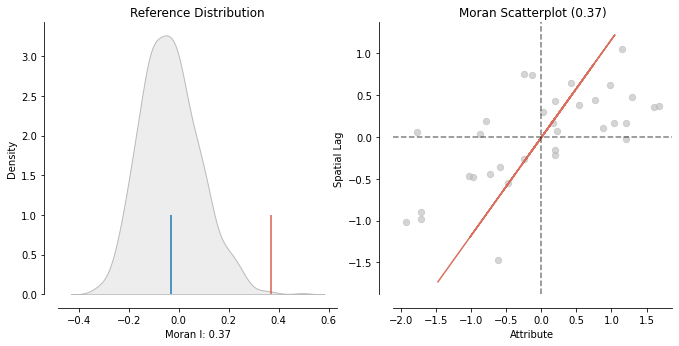

In [17]:
from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()
#fig.savefig("save/{}.jpg".format('清洁低碳全局莫兰散点图'),dpi=300) # 图片模糊问题，需要指定图片的dpi大小


### local moran'I

In [18]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation

y =boro_greenacc["green_act"].values
w = lps.weights.distance.Kernel.from_dataframe(boro_greenacc, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name':boro_greenacc.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)


                      name  loc_moran
0     Kingston upon Thames   0.616942
1                  Croydon   0.788678
2                  Bromley   0.304803
3                 Hounslow   0.037666
4                   Ealing   0.008564
5                 Havering   0.182121
6               Hillingdon   0.116546
7                   Harrow   0.103458
8                    Brent  -0.027406
9                   Barnet  -0.165984
10                 Lambeth   0.541544
11               Southwark   1.667887
12                Lewisham   0.137945
13               Greenwich   0.084308
14                  Bexley   0.130716
15                 Enfield  -0.187403
16          Waltham Forest  -0.087171
17               Redbridge  -0.072708
18                  Sutton   0.408621
19    Richmond upon Thames   0.067528
20                  Merton  -0.013887
21              Wandsworth  -0.011388
22  Hammersmith and Fulham   0.449630
23  Kensington and Chelsea   0.328517
24             Westminster   0.879297
25          

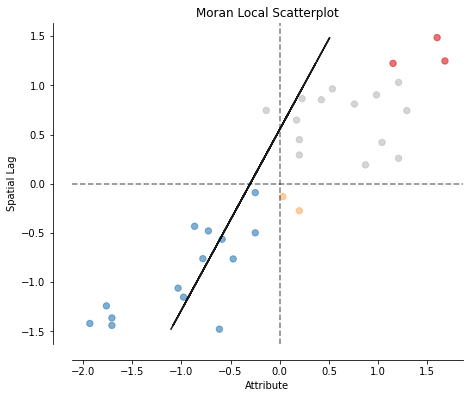

In [19]:
fig, ax = moran_scatterplot(moran_loc, p=0.1,aspect_equal=True)
#ax.set_xlabel('green_act')
#ax.set_ylabel('Spatial Lag of green_act')
plt.show()
#fig.savefig("save/{}.jpg".format('清洁低碳局部莫兰散点图'),dpi=300) # 图片模糊问题，需要指定图片的dpi大小


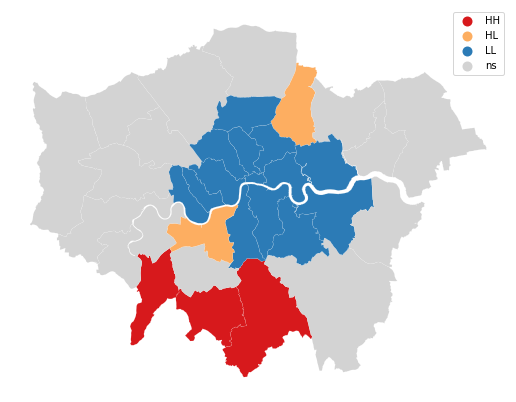

In [21]:
fig, ax = lisa_cluster(moran_loc, boro_greenacc, p=0.1, figsize = (9,9))
#fig.savefig("save/{}.jpg".format('清洁低碳聚集区的空间分布图'),dpi=300) # 图片模糊问题，需要指定图片的dpi大小

plt.savefig(os.path.join('img','Green Accesssibility local moran.png'))

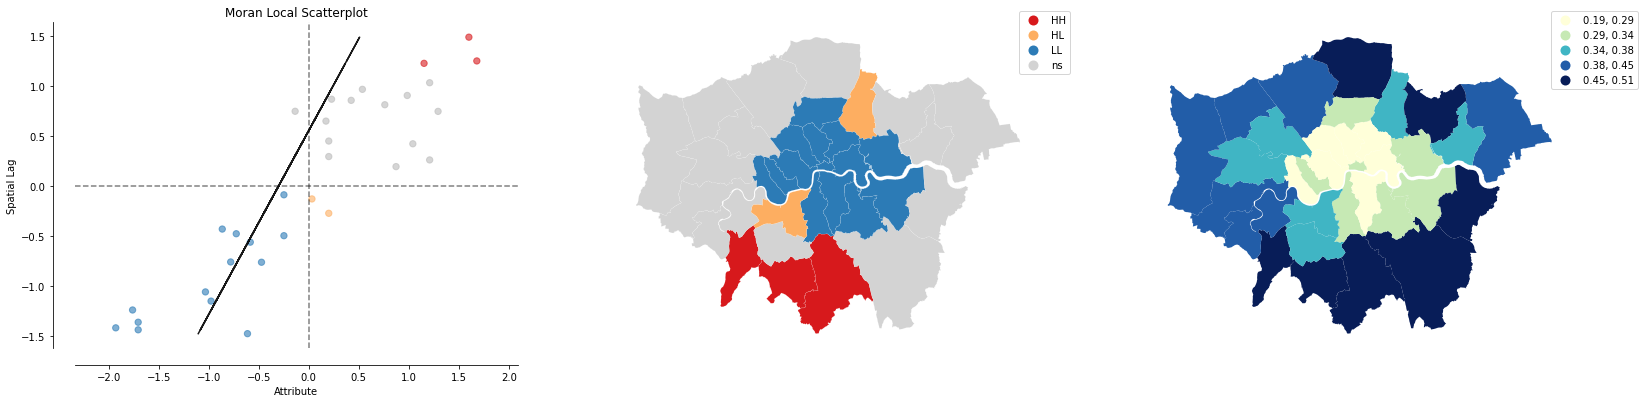

In [22]:
#绘制组合图(不展示组合图)
fig, ax = plot_local_autocorrelation(moran_loc, boro_greenacc, "green_act",p=0.1,figsize = (27,6))
#fig.savefig("save/{}.jpg".format('清洁低碳组合图'),dpi=300) # 图片模糊问题，需要指定图片的dpi大小


## lsoa level

In [ ]:
"""wq = lps.weights.Queen.from_dataframe(lsoa_greenacc)#使用Quuen式邻接矩阵
wq.transform = 'r'"""

In [ ]:
"""centroids = lsoa_greenacc.geometry.centroid # 计算多边形几何中心
# 本图将邻接矩阵覆盖在整个地图上，如果只需要邻接矩阵，删除ax = gdf_data.plot(figsize=(10, 10),cmap="Blues")
ax = boro_greenacc.plot(figsize=(10, 10),cmap="Blues")
plt.plot(centroids.x, centroids.y, '.')
for k, neighs in wq.neighbors.items():
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment.x, segment.y, '-')
plt.title('Queen Neighbor Graph')
plt.axis('off')
plt.show()
#plt.savefig("save/{}.jpg".format('wq'),dpi=300) # 图片模糊问题，需要指定图片的dpi大小
"""

In [ ]:
"""centroids = lsoa_greenacc.geometry.centroid # 计算多边形几何中心
wr = lps.weights.Rook.from_dataframe(lsoa_greenacc)# 使用Rook式邻接矩阵"""

In [ ]:
"""y = lsoa_greenacc["green_act"]
mi = esda.moran.Moran(y, wq)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)
"""

In [ ]:
"""from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()
#fig.savefig("save/{}.jpg".format('清洁低碳全局莫兰散点图'),dpi=300) # 图片模糊问题，需要指定图片的dpi大小
"""

In [ ]:
# local moran'I

In [ ]:
"""from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation

y =boro_greenacc["green_act"].values
w = lps.weights.distance.Kernel.from_dataframe(boro_greenacc, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name':boro_greenacc.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)"""

In [ ]:
"""fig, ax = moran_scatterplot(moran_loc, p=0.1,aspect_equal=True)
#ax.set_xlabel('green_act')
#ax.set_ylabel('Spatial Lag of green_act')
plt.show()
#fig.savefig("save/{}.jpg".format('清洁低碳局部莫兰散点图'),dpi=300) # 图片模糊问题，需要指定图片的dpi大小
"""

In [ ]:
"""fig, ax = lisa_cluster(moran_loc, boro_greenacc, p=0.1, figsize = (9,9))
#fig.savefig("save/{}.jpg".format('清洁低碳聚集区的空间分布图'),dpi=300) # 图片模糊问题，需要指定图片的dpi大小
"""

In [ ]:
# combined with other indepedent variables

### moran'I for all health factors

In [ ]:
other = pd.read_csv("Data_firstclean/other_factors.csv",low_memory=False)
other.head()

In [ ]:
boro_x = pd.merge(boro_greenacc, other, left_on='GSS_CODE', right_on='Area_code', how='inner')
print(boro_x.shape)
boro_x.head()

In [ ]:
boro_x.drop(["LAD11CD",'Area_code',"Area_name"],axis=1, inplace=True)
print(boro_x.shape)
boro_x.head()

In [ ]:
boro_x.info()

####　obesity

In [ ]:
wq = lps.weights.Queen.from_dataframe(boro_x)
wq.transform = 'r' # 标准化矩阵
centroids = boro_x.geometry.centroid # 计算多边形几何中心
wr = lps.weights.Rook.from_dataframe(boro_x)# 使用Rook式邻接矩阵


In [ ]:
y = boro_x["Percentage_of_obesity(age18+)"]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


In [ ]:
from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()

In [ ]:
#local moran'I
y = boro_x["Percentage_of_obesity(age18+)"].values
w = lps.weights.distance.Kernel.from_dataframe( boro_x, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name': boro_x.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)


In [ ]:
fig, ax = plot_local_autocorrelation(moran_loc, boro_x, 'Percentage_of_obesity(age18+)',p=0.1,figsize = (27,6))

####　death from respiratory_diseases

In [ ]:
y = boro_x["Deaths_from_respiratory_diseases"]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


In [ ]:
from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()

In [ ]:
#local moran'I
y = boro_x["Deaths_from_respiratory_diseases"].values
w = lps.weights.distance.Kernel.from_dataframe( boro_x, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name': boro_x.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)


In [ ]:
fig, ax = plot_local_autocorrelation(moran_loc, boro_x, "Deaths_from_respiratory_diseases",p=0.1,figsize = (27,6))

#### Deaths_from_coronary_diseases

In [ ]:
y = boro_x["Deaths_from_coronary_diseases "]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


In [ ]:
from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()

In [ ]:
#local moran'I
y = boro_x["Deaths_from_coronary_diseases "].values
w = lps.weights.distance.Kernel.from_dataframe( boro_x, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name': boro_x.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)


In [ ]:
fig, ax = plot_local_autocorrelation(moran_loc, boro_x, "Deaths_from_coronary_diseases ",p=0.1,figsize = (27,6))

#### TB_incidence

In [ ]:
y = boro_x["TB_incidence"]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


In [ ]:
from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()

In [ ]:
#local moran'I
y = boro_x["TB_incidence"].values
w = lps.weights.distance.Kernel.from_dataframe( boro_x, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name': boro_x.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)


In [ ]:
fig, ax = plot_local_autocorrelation(moran_loc, boro_x, "TB_incidence",p=0.1,figsize = (27,6))

### moran'I for activity

In [ ]:
y = boro_x["Active"]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


In [ ]:
from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()

In [ ]:
#local moran'I
y = boro_x["Active"].values
w = lps.weights.distance.Kernel.from_dataframe( boro_x, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name': boro_x.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)


In [ ]:
fig, ax = plot_local_autocorrelation(moran_loc, boro_x, "Active",p=0.1,figsize = (27,6))

In [ ]:
#sns.set(style="white")
#sns.pairplot(boro_x, markers=".", height=3, diag_kind='kde');

# covid case 

In [ ]:
other1 = pd.read_csv("Data_firstclean/other_factors2.csv",low_memory=False)
other1.head()

In [ ]:
boro_xy = pd.merge(boro_greenacc, other1, left_on='GSS_CODE', right_on='Area_code', how='inner')
print(boro_xy.shape)
boro_xy.head()

In [ ]:
wq = lps.weights.Queen.from_dataframe(boro_xy)
wq.transform = 'r' # 标准化矩阵
centroids = boro_xy.geometry.centroid # 计算多边形几何中心
wr = lps.weights.Rook.from_dataframe(boro_xy)# 使用Rook式邻接矩阵


### total case

In [ ]:
y = boro_xy["total_case_rate"]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)


In [ ]:
from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()

In [ ]:
#local moran'I
y = boro_xy["total_case_rate"].values
w = lps.weights.distance.Kernel.from_dataframe( boro_xy, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name': boro_xy.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)


In [ ]:
fig, ax = plot_local_autocorrelation(moran_loc, boro_xy, 'total_case_rate',p=0.1,figsize = (27,6))


In [ ]:
#Bivariate Moran Statistics

In [ ]:
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

In [ ]:
x = boro_xy["green_act"].values

In [ ]:
moran = esda.moran.Moran(y, wq)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()

In [ ]:
plot_moran_bv(moran_bv)
plt.show()

In [ ]:
#Local Bivariate Moran Statistics

In [ ]:
from esda.moran import Moran_Local_BV

In [ ]:
moran_loc_bv = Moran_Local_BV(x, y, w)
fig, ax = moran_scatterplot(moran_loc_bv, p=0.05)
ax.set_xlabel("green accessibility")
ax.set_ylabel('covid cases')
plt.show()

In [ ]:
plot_local_autocorrelation(moran_loc_bv, boro_xy, 'green_act')
plt.show()

In [ ]:
# 比如对于X1输出的是“高-高”，这个意思是X1是高值区，而它地理空间周围的Yi也是高值区。

### covid cases between 0-60

In [ ]:
y = boro_xy["infection_tate(60-)"]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

In [ ]:
from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()

In [ ]:
#local moran'I
y = boro_xy["infection_tate(60-)"].values
w = lps.weights.distance.Kernel.from_dataframe( boro_xy, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name': boro_xy.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)


In [ ]:
fig, ax = plot_local_autocorrelation(moran_loc, boro_xy, 'infection_tate(60-)',p=0.1,figsize = (27,6))


In [ ]:
#Bivariate Moran Statistics

In [ ]:
x = boro_xy["green_act"].values

In [ ]:
moran = esda.moran.Moran(y, wq)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()

In [ ]:
plot_moran_bv(moran_bv)
plt.show()

In [ ]:
#Local Bivariate Moran Statistics

In [ ]:
moran_loc_bv = Moran_Local_BV(x, y, w)
fig, ax = moran_scatterplot(moran_loc_bv, p=0.05)
ax.set_xlabel("green accessibility")
ax.set_ylabel('covid0_60')
plt.show()

In [ ]:
plot_local_autocorrelation(moran_loc_bv, boro_xy, 'green_act')
plt.show()

### covid cases between 60+

In [ ]:
y = boro_xy["infection_tate(60+)"]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

In [ ]:
from splot.esda import plot_moran
fig, ax = plot_moran(mi, zstandard=True, figsize=(11,5),aspect_equal=False)
fig.show()

In [ ]:
#local moran'I
y = boro_xy["infection_tate(60+)"].values
w = lps.weights.distance.Kernel.from_dataframe( boro_xy, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# 局部莫兰指数
loc_moran_df = pd.DataFrame({'name': boro_xy.NAME, 'loc_moran':moran_loc.Is}) # moran_loc.Is是各省的局部莫兰指数
print(loc_moran_df)


In [ ]:
fig, ax = plot_local_autocorrelation(moran_loc, boro_xy, 'infection_tate(60+)',p=0.1,figsize = (27,6))


In [ ]:
#Bivariate Moran Statistics

In [ ]:
x = boro_xy["green_act"].values

In [ ]:
moran = esda.moran.Moran(y, wq)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()

In [ ]:
plot_moran_bv(moran_bv)
plt.show()

In [ ]:
#Local Bivariate Moran Statistics

In [ ]:
moran_loc_bv = Moran_Local_BV(x, y, w)
fig, ax = moran_scatterplot(moran_loc_bv, p=0.05)
ax.set_xlabel("green accessibility")
ax.set_ylabel('covid+60')
plt.show()

In [ ]:
plot_local_autocorrelation(moran_loc_bv, boro_xy, 'green_act')
plt.show()